In [1]:
import pandas as pd
from  matplotlib import pyplot as plt

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[4, 6, 10, 12, 8]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0290
3     0.0875
4     0.1758
5     0.2797
6     0.4208
7     0.5885
8     0.7206
9     0.8304
10    0.9136
11    0.9715
12    1.0000
Name: count, dtype: float64

<Axes: >

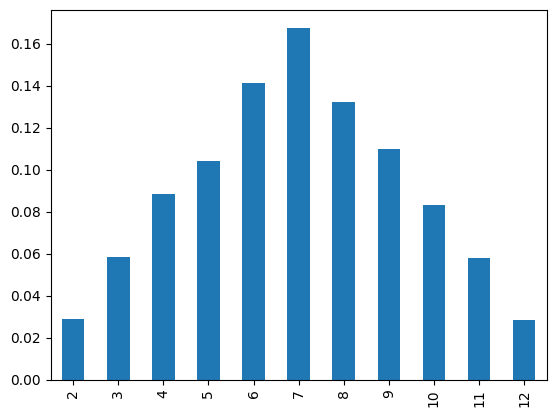

In [8]:
s.plot(kind='bar')

<Axes: >

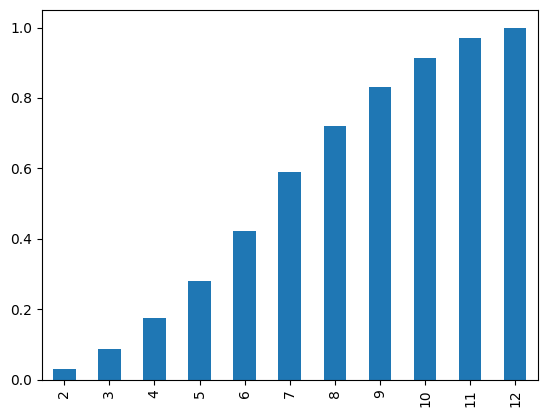

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.ndim

1

In [12]:
print(sample.max())
print(np.max(sample))

print(sample.min())
print(np.min(sample))

print(sample.std())
print(np.std(sample))


67.39999869020724
67.39999869020724
29.593125488824747
29.593125488824747
4.89218394886944
4.89218394886944


In [13]:
sample.mean()

np.float64(49.94891493220623)

(array([  1.,   4.,  31.,  97., 240., 322., 204.,  80.,  14.,   7.]),
 array([29.59312549, 33.37381281, 37.15450013, 40.93518745, 44.71587477,
        48.49656209, 52.27724941, 56.05793673, 59.83862405, 63.61931137,
        67.39999869]),
 <BarContainer object of 10 artists>)

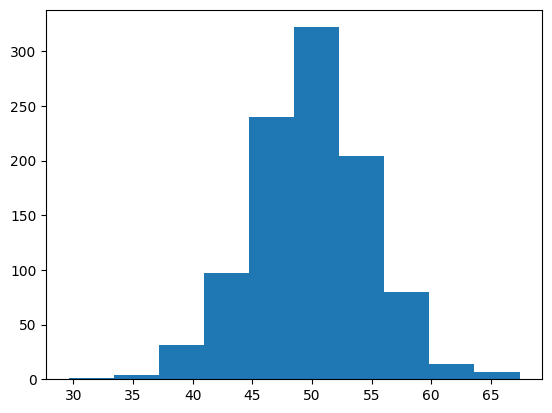

In [14]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [15]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [16]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [17]:
values = np.linspace(sample.min(),sample.max(),100)

In [18]:
sample.max()

np.float64(67.39999869020724)

In [19]:
probabilities_density = [dist.pdf(value) for value in values]


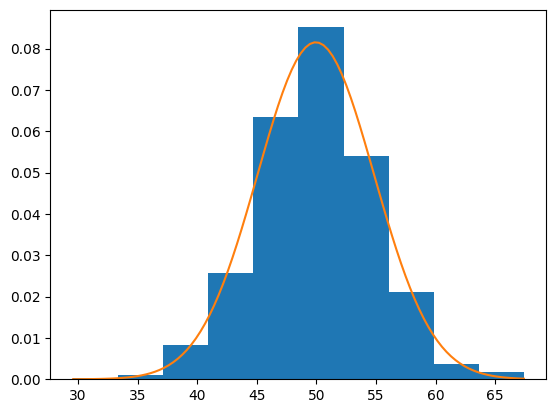

In [20]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities_density)

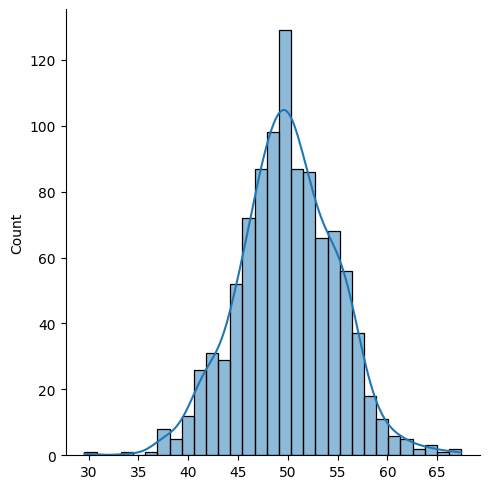

In [21]:
import seaborn as sns
sns.displot(sample, kde=True)

# KDE

In [22]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [23]:
len(sample)

1000

(array([ 2.,  0.,  0.,  0.,  3.,  6.,  1.,  9., 13., 13., 11., 20., 23.,
        17., 25., 24., 24., 17., 15., 18., 17., 17., 10., 11., 19.,  5.,
        13., 26., 22., 18., 25., 43., 48., 59., 64., 62., 57., 60., 45.,
        43., 28., 19., 16., 14.,  8.,  4.,  4.,  1.,  0.,  1.]),
 array([ 4.4568083 ,  5.47921065,  6.501613  ,  7.52401535,  8.5464177 ,
         9.56882004, 10.59122239, 11.61362474, 12.63602709, 13.65842944,
        14.68083179, 15.70323413, 16.72563648, 17.74803883, 18.77044118,
        19.79284353, 20.81524588, 21.83764822, 22.86005057, 23.88245292,
        24.90485527, 25.92725762, 26.94965997, 27.97206231, 28.99446466,
        30.01686701, 31.03926936, 32.06167171, 33.08407405, 34.1064764 ,
        35.12887875, 36.1512811 , 37.17368345, 38.1960858 , 39.21848814,
        40.24089049, 41.26329284, 42.28569519, 43.30809754, 44.33049989,
        45.35290223, 46.37530458, 47.39770693, 48.42010928, 49.44251163,
        50.46491398, 51.48731632, 52.50971867, 53.53212102,

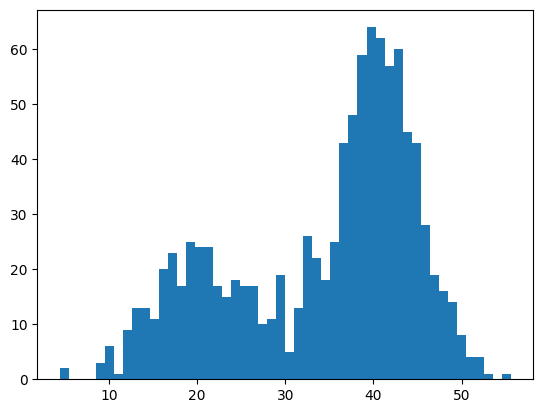

In [24]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [25]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=2, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=2)

In [26]:
sample.min()

np.float64(4.456808302649264)

In [27]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [28]:
probabilities_density = model.score_samples(values)
probabilities_density = np.exp(probabilities_density)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

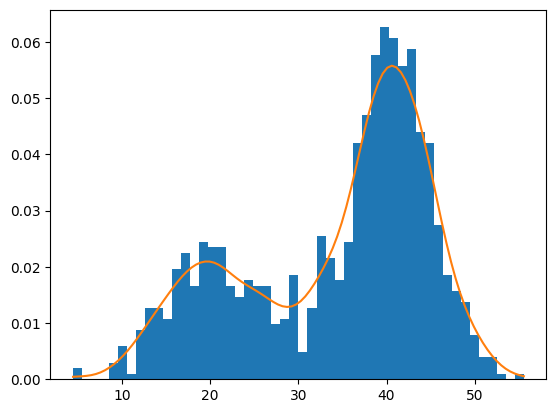

In [29]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities_density)
plt.show()

<Axes: ylabel='Density'>

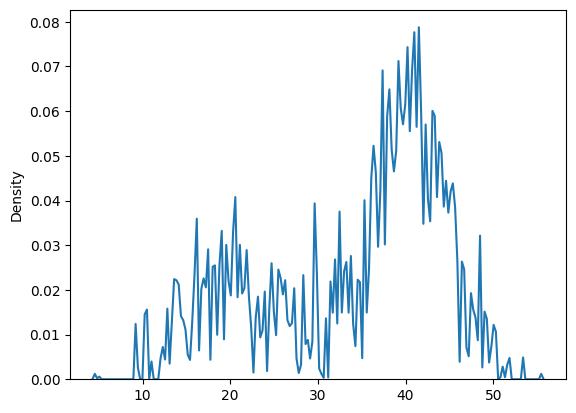

In [30]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02) ##bw_adjust = bandwith(std)

In [31]:
import seaborn as sns

In [32]:
df = sns.load_dataset('iris')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

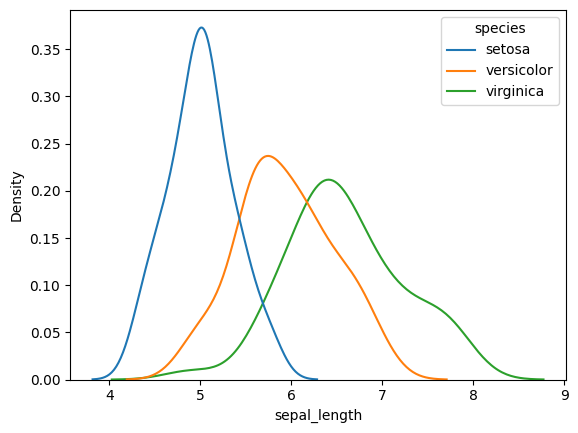

In [34]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

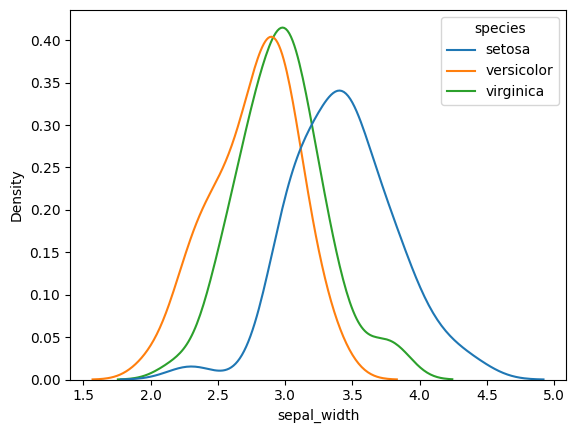

In [35]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

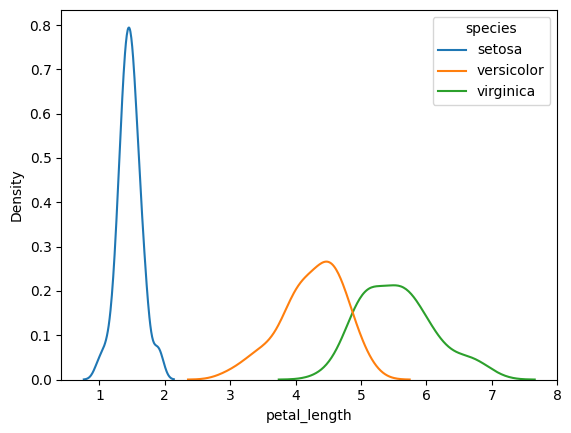

In [36]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

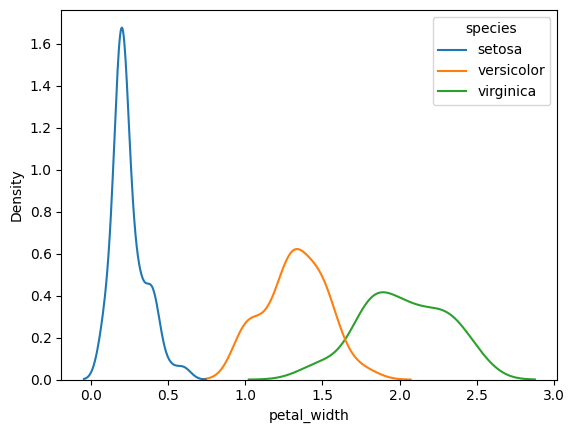

In [37]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

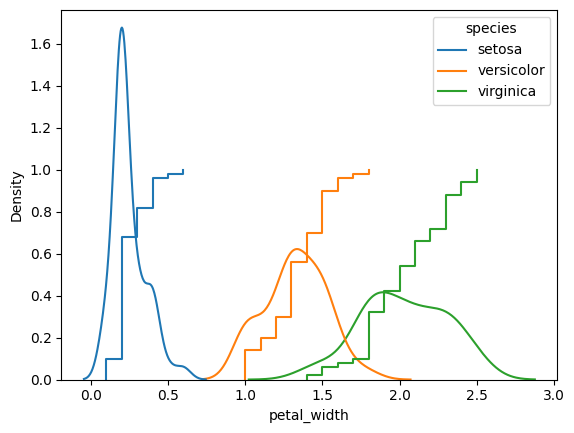

In [38]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [39]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

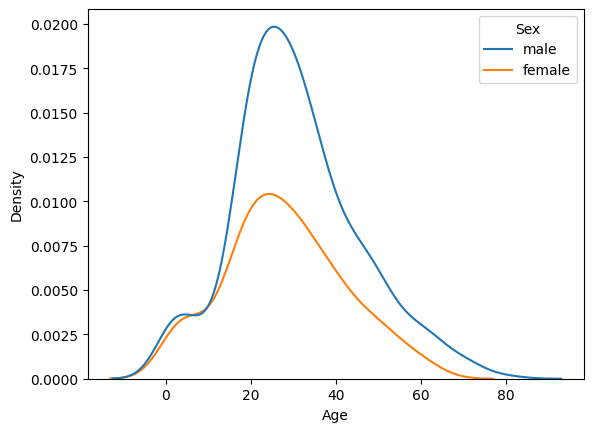

In [41]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

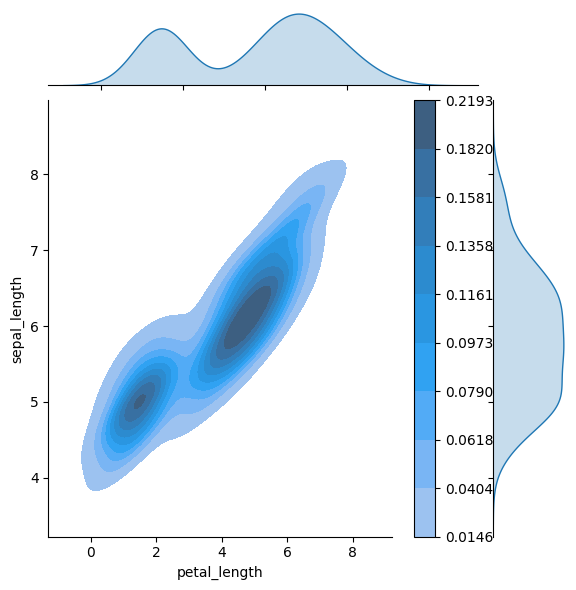

In [42]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

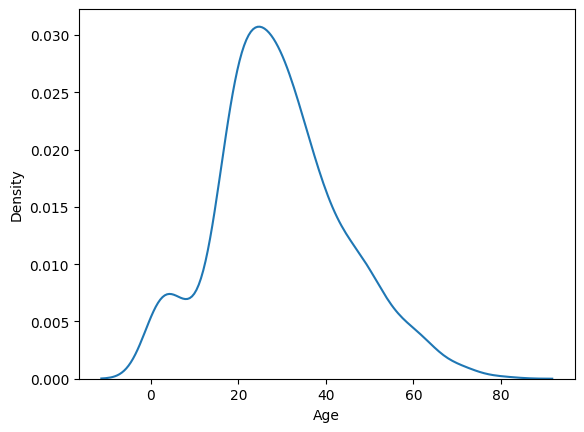

In [43]:
sns.kdeplot(titanic['Age'])

In [44]:
print(f"Mean Value Before Standard Normal dis: {titanic['Age'].mean()}")
print(f"STD Value Before Standard Normal dis: {titanic['Age'].std()}")

Mean Value Before Standard Normal dis: 29.69911764705882
STD Value Before Standard Normal dis: 14.526497332334042


## Converting into the Standard Normal distribution

In [45]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [46]:
print(f"Mean Value after Standard Normal dis: {x.mean()}")
print(f"STD Value after Standard Normal dis: {x.std()}")

Mean Value after Standard Normal dis: 2.338621049070358e-16
STD Value after Standard Normal dis: 1.0


<Axes: xlabel='Age', ylabel='Density'>

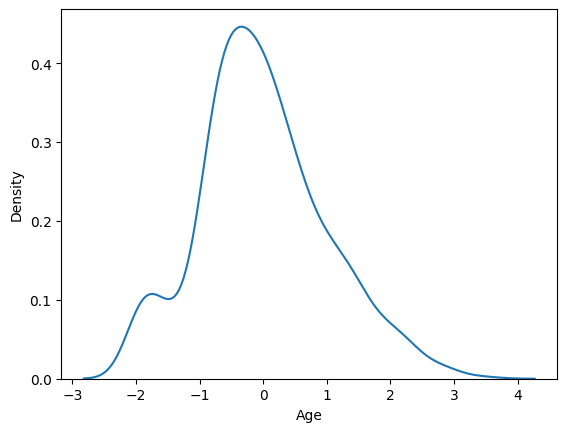

In [47]:
sns.kdeplot(x)

In [48]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [49]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406094)

In [50]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.880374349943303)

In [51]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [52]:
titanic['Age'].max()

np.float64(80.0)

In [53]:
## THIS IS TEST COMMIT FROM LAP_DEV_4873